# Домашняя лабораторная работа №1 по вычислительной математике

Егоров Иван, Б01-008

## Задача VIII.11.3

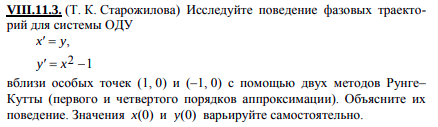

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from typing import Tuple

Point = Tuple[float, float]

### Метод Рунге-Кутты 1 порядка (Эйлера)

**Описание метода**

Имеем систему ДУ:
$$
\frac{d \overrightarrow{u}}{dt} = f\left(t, \overrightarrow{u}\right), \:
\overrightarrow{u} = 
\left[
  \begin{matrix}
  x\\y
  \end{matrix}
\right]
$$
С начальными условиями
$$
\overrightarrow{u}(0) = \overrightarrow{u_0} = 
\left[
  \begin{matrix}
  x_0\\y_0
  \end{matrix}
\right]
$$

Для метода Рунге-Кутты 1 порядка (метод Эйлера) имеем формулу
$$
\frac{
  \overrightarrow{y_{n+1}} - \overrightarrow{y_n}
}{\tau} = 
f\left(t_n, \overrightarrow{y_n} \right) ⇔
\overrightarrow{y_{n+1}} = \overrightarrow{y_n} + 
\tau \cdot f\left(t_n, \overrightarrow{y_n} \right)
$$
Где $\overrightarrow{y}$  дискретизованное значение $\overrightarrow{u}$ по сетке

In [21]:
def f(time, u):
  return np.array([u[1], u[0]**2 - 1])

def Euler(t_end, x0, y0, tau):
  u_prev = np.array([x0, y0])
  u = [u_prev]

  for t_n in np.arange(tau, t_end + tau, tau):
    u_next = u_prev + tau * f(t_n, u_prev)
    u_prev = u_next
    u.append(u_next)

  return u

def SolveNPrint(time, start_p : Point, center_p : Point, method, step = 1e-3):
  u = np.transpose(method(time, start_p[0], start_p[1], step))

  plt.figure(figsize=[25, 10])
  plt.title(f'Фазовая траектория в окрестности точки ({center_p[0]} , {center_p[1]})')
  plt.plot(u[0] - center_p[0], u[1] - center_p[1], 'g.')
  # plt.plot(center_p[0] , center_p[1], 'o')
  plt.xlabel('x', fontsize=20)
  plt.ylabel('y', fontsize=20)
  plt.grid()
  plt.show()

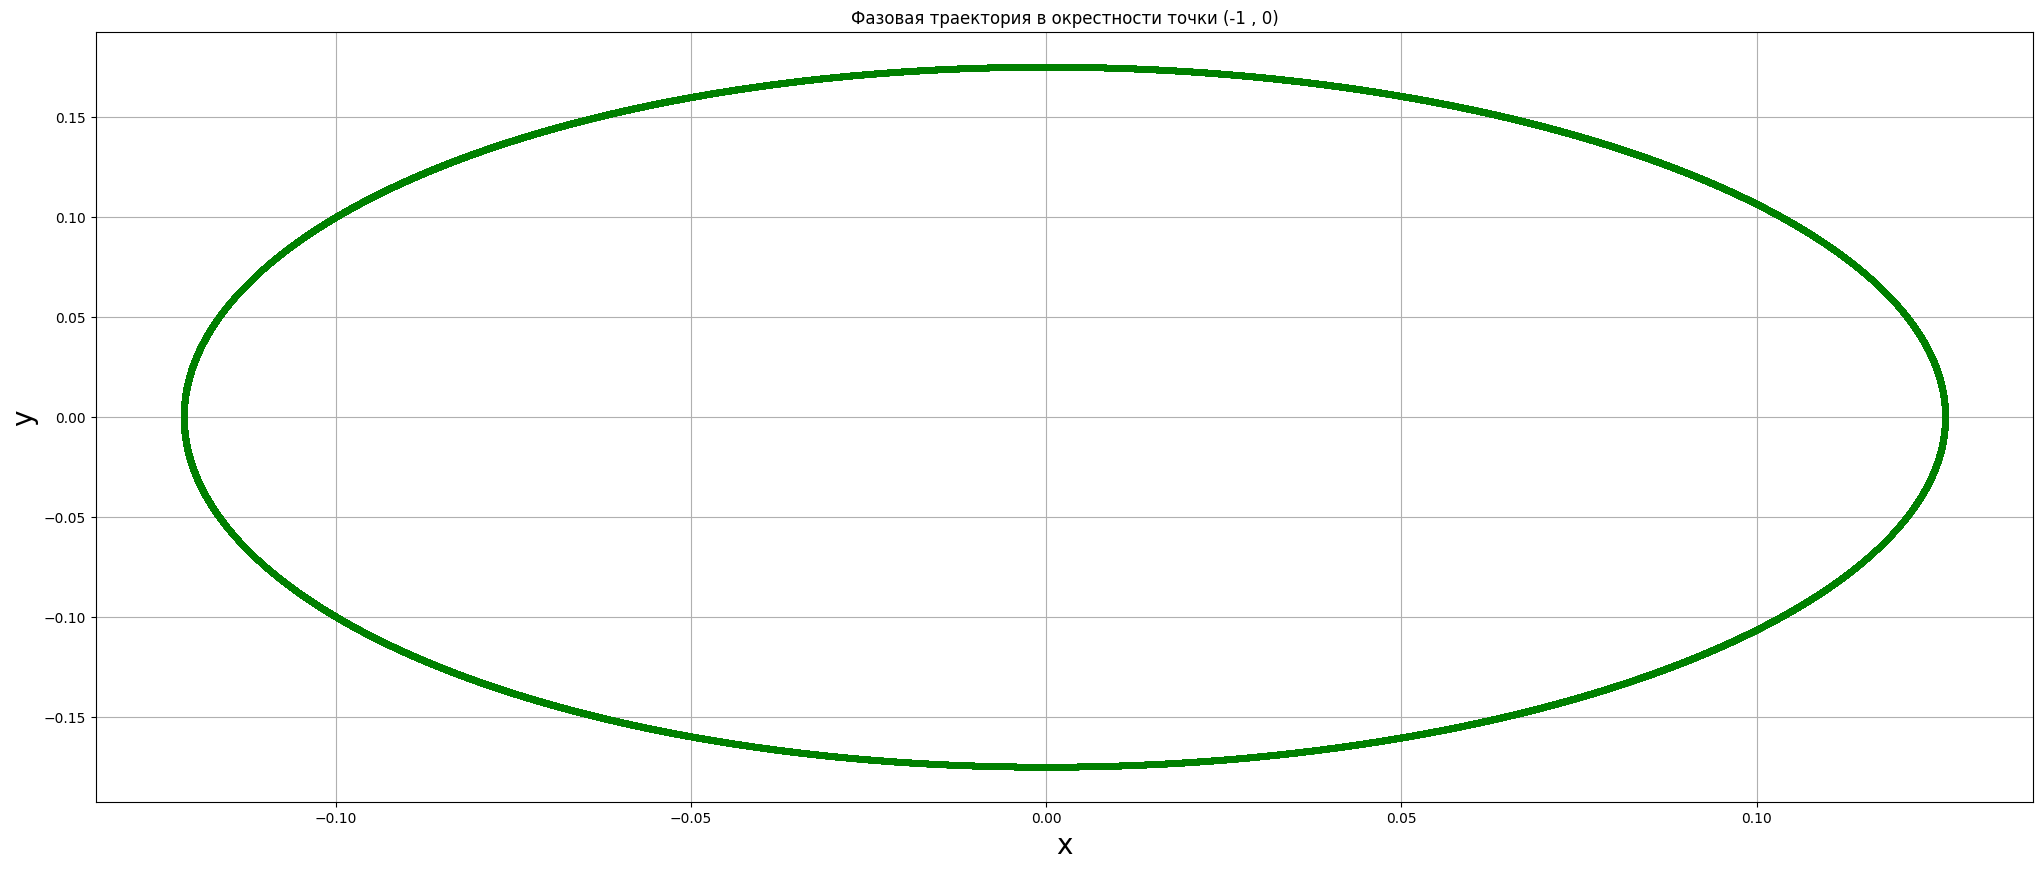

In [22]:
SolveNPrint(5, start_p=(-1.1, -0.1), center_p=(-1, 0), method=Euler, step=1e-5)

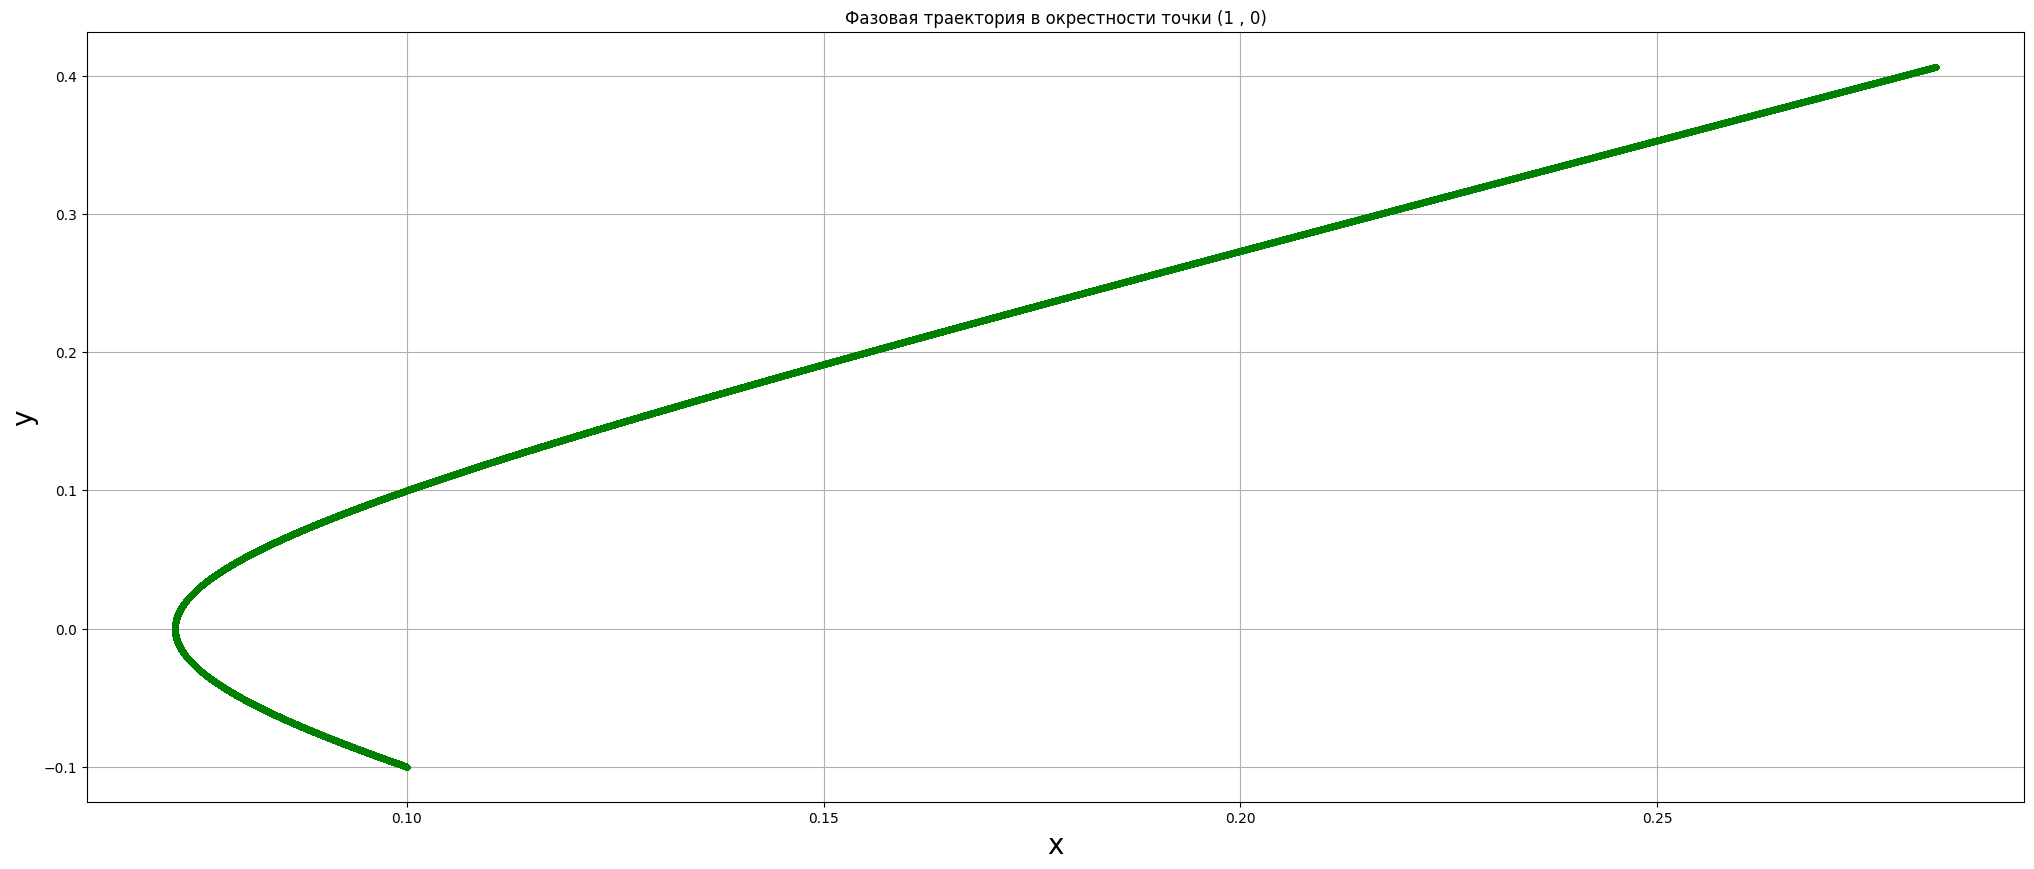

In [23]:
SolveNPrint(2, start_p=(1.1, -0.1), center_p=(1, 0), method=Euler, step=1e-5)

### Метод Рунге-Кутты 4 порядка

**Описание метода**

Имеем систему ДУ:
$$
\frac{d \overrightarrow{u}}{dt} = f\left(t, \overrightarrow{u}\right), \:
\overrightarrow{u} = 
\left[
  \begin{matrix}
  x\\y
  \end{matrix}
\right]
$$
С начальными условиями
$$
\overrightarrow{u}(0) = \overrightarrow{u_0} = 
\left[
  \begin{matrix}
  x_0\\y_0
  \end{matrix}
\right]
$$

Для метода Рунге-Кутты 4 порядка имеем
$$
f_1 = f\left(t_n, \overrightarrow{y_n}\right) \:\:\:\:\:\:\:\:
f_2 = f\left(t_n + \frac{\tau}{2}, \overrightarrow{y_n} + \frac{\tau}{2}f_1\right)
$$
$$
f_3 = f\left(t_n + \frac{\tau}{2}, \overrightarrow{y_n} + \frac{\tau}{2}f_2\right) \:\:\:\:\:\:\:\:
f_4 = f\left(t_n + \tau, \overrightarrow{y_n} + \tau f_3\right)
$$
$$
\overrightarrow{y_{n+1}} = \overrightarrow{y_n} + 
\frac{\tau}{6}\left(
f_1 + 2f_2 + 2f_3 + f_4
\right)
$$
Где $\overrightarrow{y}$  дискретизованное значение $\overrightarrow{u}$ по сетке, $\tau$ - шаг по времени

In [24]:
def RungeKutt4(t_end, x0, y0, tau):
  u_prev = np.array([x0, y0])
  u = [u_prev]

  for t_n in np.arange(tau, t_end + tau, tau):
    f_1 = f(t_n, u_prev)
    f_2 = f(t_n + tau / 2, u_prev + tau / 2 * f_1)
    f_3 = f(t_n + tau / 2, u_prev + tau / 2 * f_2)
    f_4 = f(t_n + tau, u_prev + tau * f_3)

    u_next = u_prev + tau / 6 * (f_1 + 2 * f_2 + 2 * f_3 + f_4)
    u_prev = u_next
    u.append(u_next)

  return u

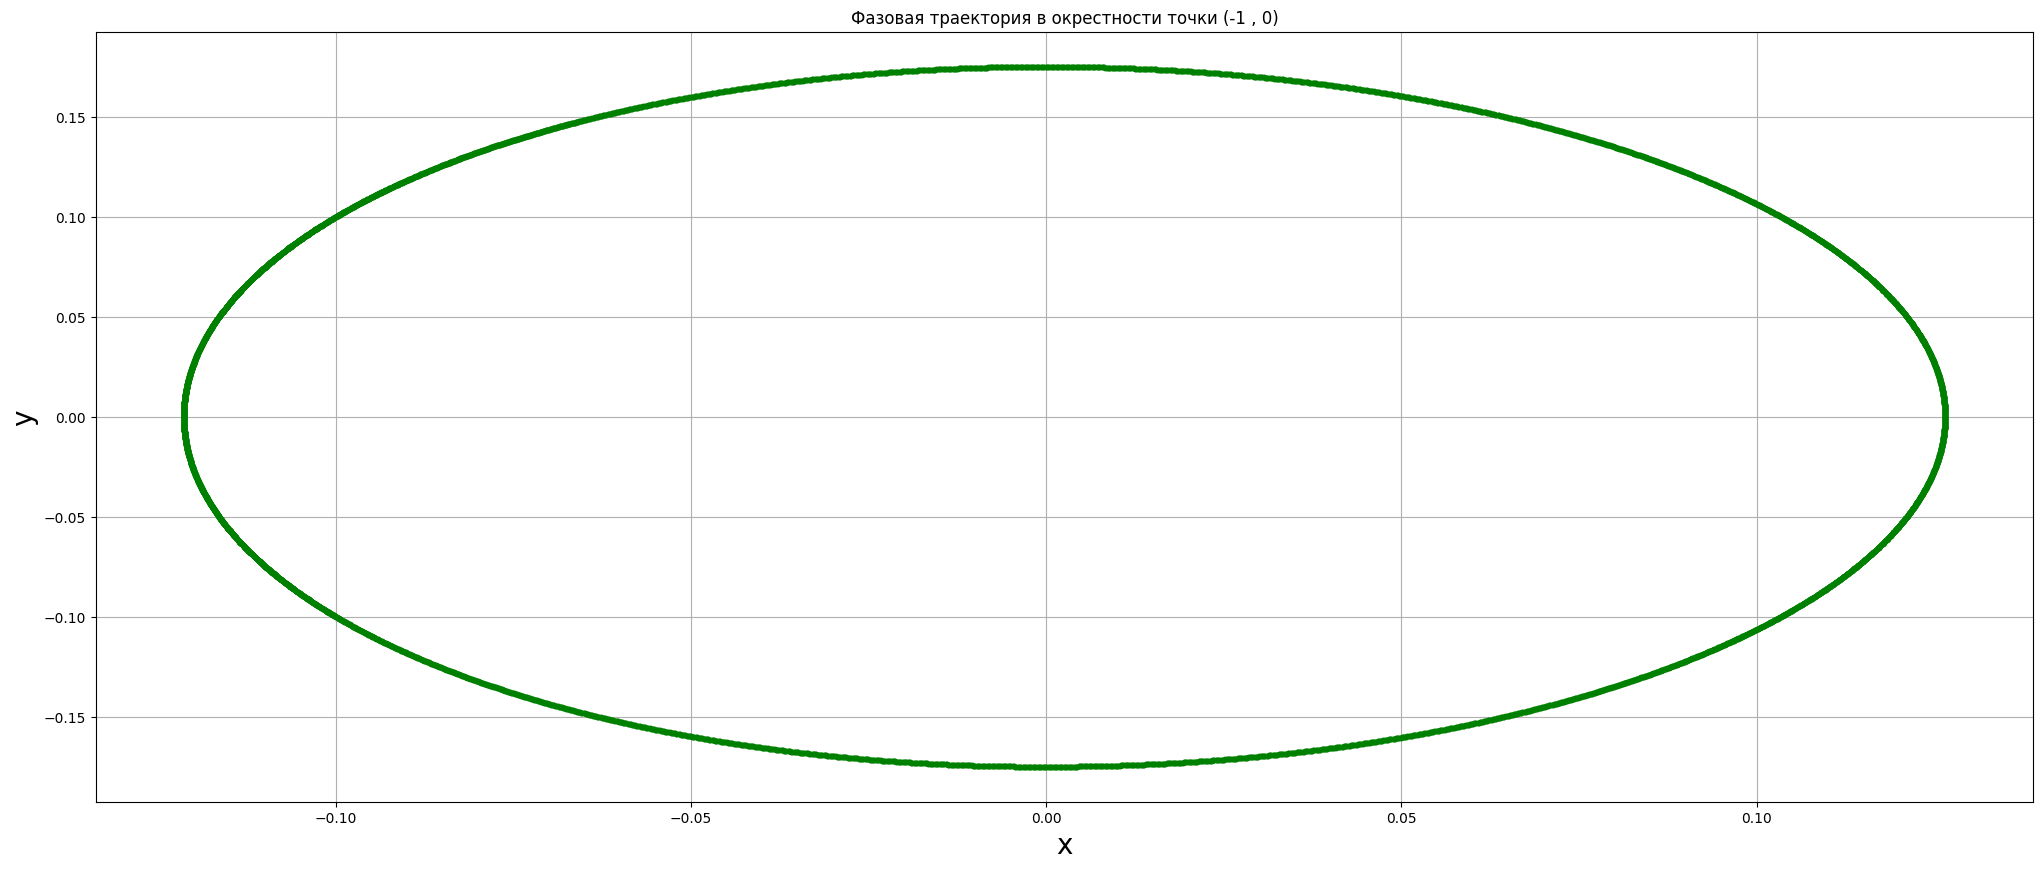

In [25]:
SolveNPrint(10, start_p=(-1.1, -0.1), center_p=(-1, 0), method=RungeKutt4, step=1e-3)

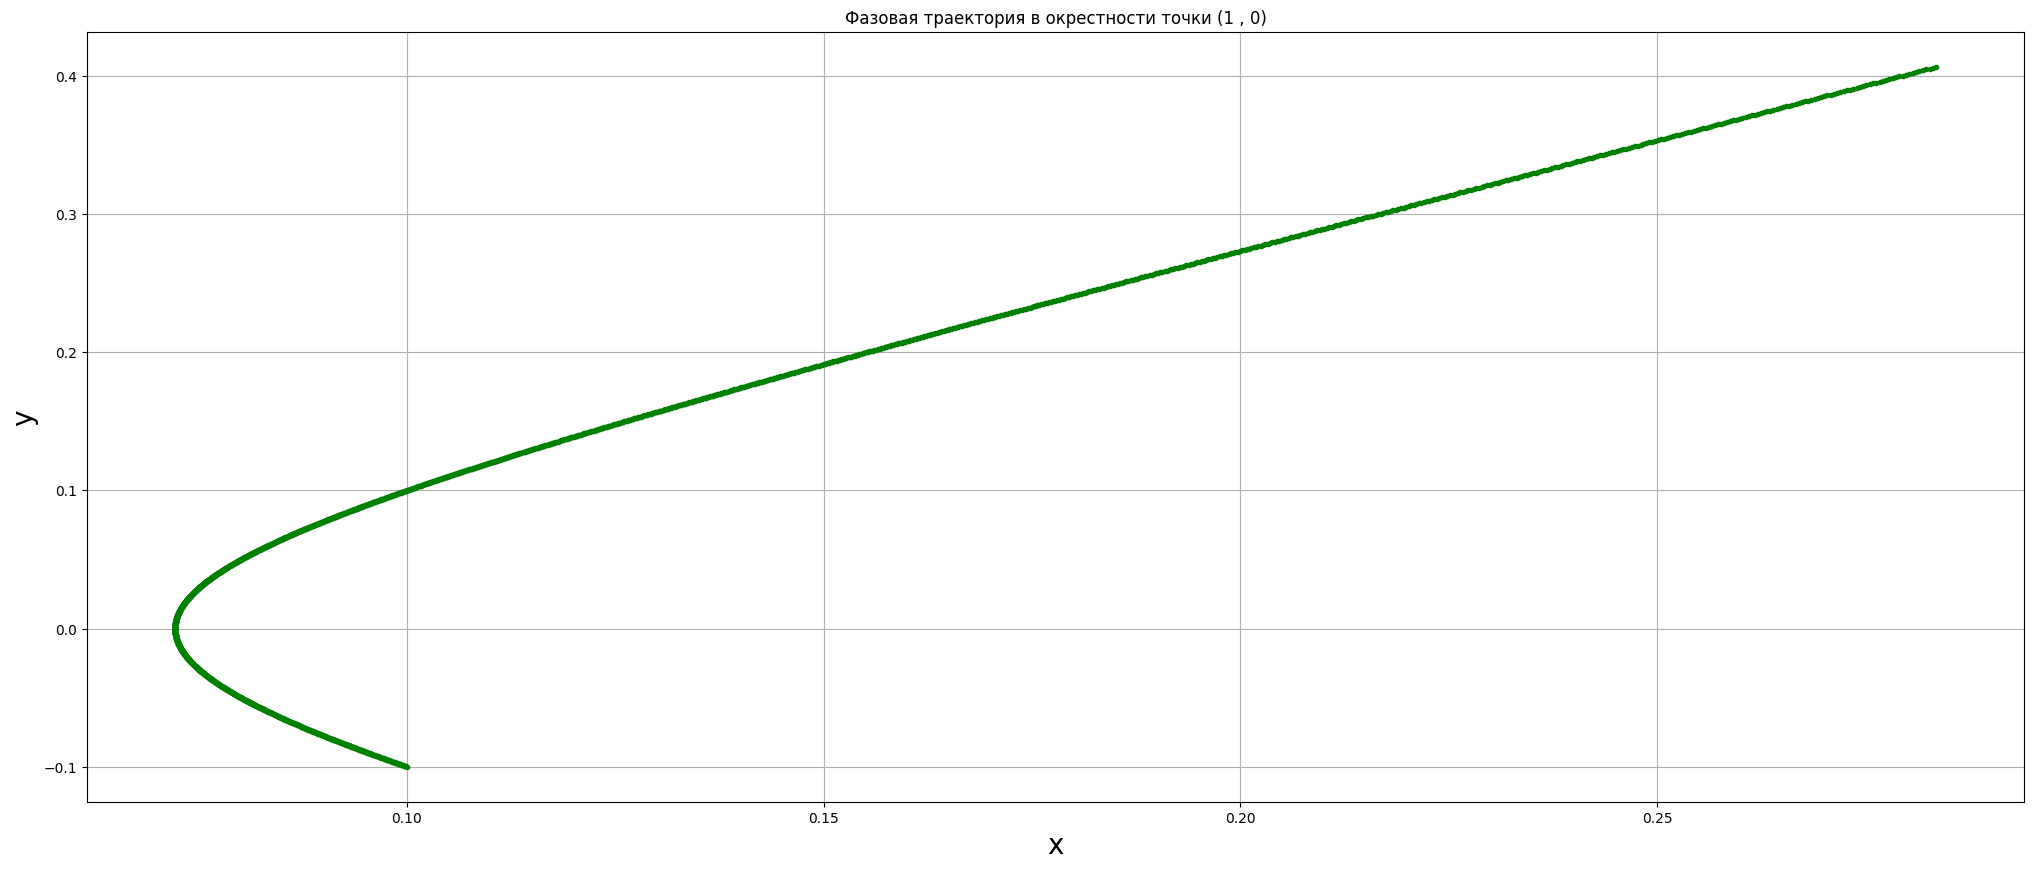

In [26]:
SolveNPrint(2, start_p=(1.1, -0.1), center_p=(1, 0), method=RungeKutt4, step=1e-3)

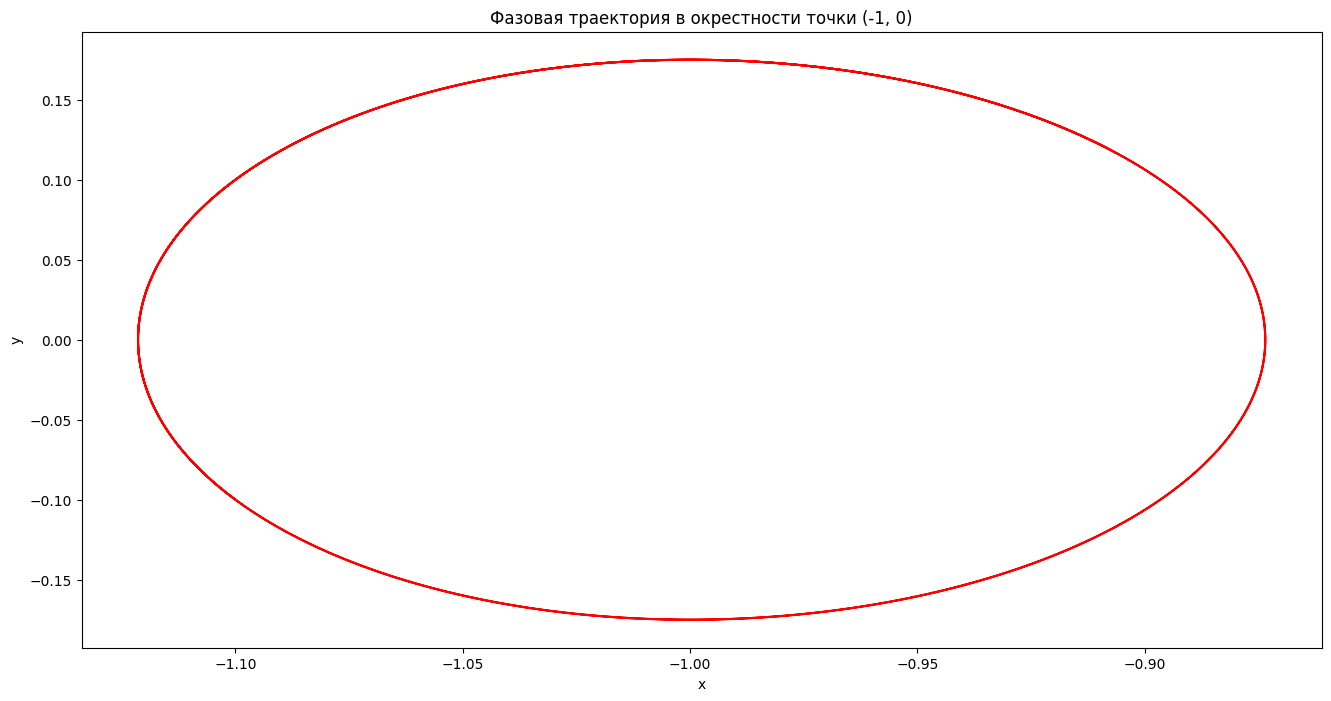

In [30]:
def Addams(f, init, iter_nums):
    sol = init
    t = 0
    
    for _ in range(iter_nums):
        sol.append(sol[-1] + 0.01 * (55/24*f(1, sol[-1]) - \
                        59/24*f(1, sol[-2]) + 37/24*f(1, sol[-3]) - \
                        3/8*f(1, sol[-4])))

        t += 0.01
            
    return sol

def draw(points):
    plt.figure(figsize=[16, 8])
    plt.title(f'Фазовая траектория в окрестности точки (-1, 0)')
    plt.plot([item[0] for item in points], [item[1] for item in points], color='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

init = RungeKutt4(10, -1.1, -0.1, 1e-3)
points = Addams(f, init, 100)
draw(points=points)
